In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

BASE_DIR = os.path.abspath(os.path.join(".."))
PROC_DIR = os.path.join(BASE_DIR, "processed")
SPLITS = ["train", "val", "test"]
CLASSES = ["NORMAL", "PNEUMONIA"]


In [2]:
data = []
for split in SPLITS:
    for cls in CLASSES:
        path = os.path.join(PROC_DIR, split, cls, "*.png")
        n = len(glob.glob(path))
        data.append({"split": split, "class": cls, "count": n})
df = pd.DataFrame(data)
display(df)

,split,class,count
0,train,NORMAL,1341
1,train,PNEUMONIA,3875
2,val,NORMAL,8
3,val,PNEUMONIA,8
4,test,NORMAL,234
5,test,PNEUMONIA,390


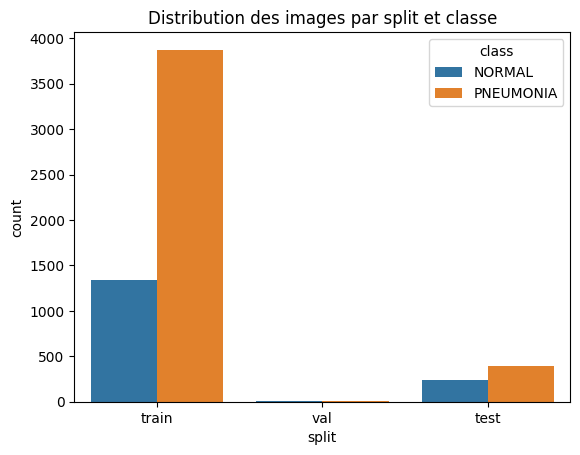

In [4]:
import seaborn as sns
sns.barplot(data=df, x="split", y="count", hue="class")
plt.title("Distribution des images par split et classe")
plt.savefig("../reports/figures/eda_count_distribution.png", 
            dpi=150, bbox_inches="tight")
plt.show()

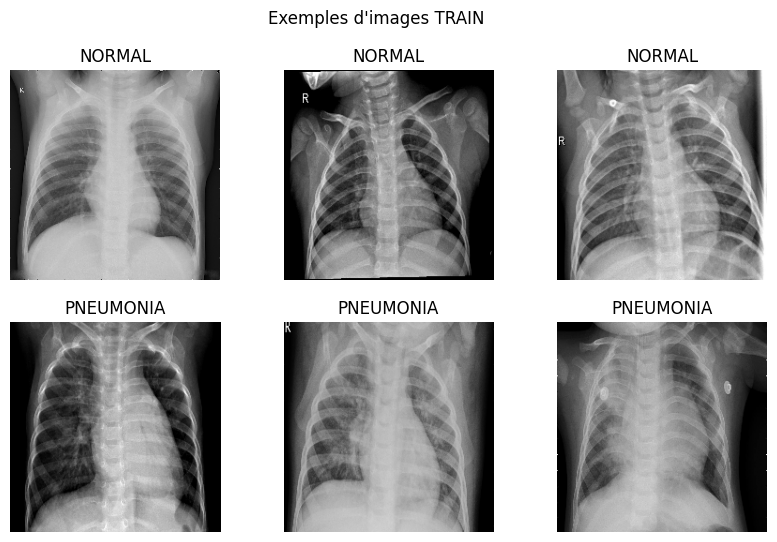

In [7]:
fig, axes = plt.subplots(2,3, figsize=(10,6))
for i, cls in enumerate(CLASSES):
    files = glob.glob(os.path.join(PROC_DIR, "train", cls, "*.png"))
    samples = np.random.choice(files, 3, replace=False)
    for j, fp in enumerate(samples):
        img = Image.open(fp)
        axes[i,j].imshow(img, cmap="gray")
        axes[i,j].set_title(cls)
        axes[i,j].axis("off")
plt.suptitle("Exemples d'images TRAIN")
plt.savefig("../reports/figures/eda_samples.png", 
            dpi=150, bbox_inches="tight")
plt.show()


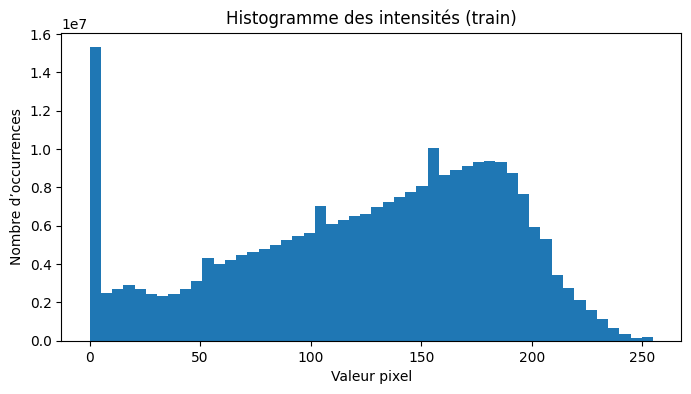

In [6]:
pixels = []
for split in ["train"]:
    for cls in CLASSES:
        for fp in glob.glob(os.path.join(PROC_DIR, split, cls, "*.png")):
            img = np.array(Image.open(fp)).ravel()
            pixels.append(img)
pixels = np.concatenate(pixels)
plt.figure(figsize=(8,4))
plt.hist(pixels, bins=50)
plt.title("Histogramme des intensités (train)")
plt.xlabel("Valeur pixel")
plt.ylabel("Nombre d’occurrences")
plt.savefig("../reports/figures/eda_intensity_histogram.png", 
            dpi=150, bbox_inches="tight")
plt.show()